# SUBMISSION FOR LINEAR REGRESSION

Name: Hoai Linh

Class: ML01

# Load thư viện

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from abc import abstractmethod


# 1: Đọc file dữ liệu

In [ ]:
datafile1 = pd.read_csv("linear.csv")
area = datafile1["Diện tích"]
price = datafile1["Giá"]


In [ ]:
datafile2 = pd.read_csv("nonlinear.csv")
_area = datafile2["Diện tích"]
_price = datafile2["Giá nhà"]


# 2: Tính correlation

In [ ]:
#Tạo hàm tương quan
def correlation(x, y):
    
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))

    sub_x = [i-mean_x for i in x]
    sub_y = [i-mean_y for i in y]

    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])

    std_deviation_x = sum([sub_x[i]**2.0 for i in range(len(sub_x))])
    std_deviation_y = sum([sub_y[i]**2.0 for i in range(len(sub_y))])

    denominator = (std_deviation_x*std_deviation_y)**0.5
    cor = numerator/denominator
    return cor


In [ ]:
#Tương quan dựa vào hàm tự tạo
cor_func = correlation(area, price)
print("(Sử dụng hàm tự tạo) Correlation giữa Diện tích và Giá là:", cor_func)


(Sử dụng hàm tự tạo) Correlation giữa Diện tích và Giá là: 0.998781277915114


In [ ]:
#Tương quan từ hàm có sẵn
cor = area.corr(price)
print("(Sử dụng hàm có sẵn) Correlation giữa Diện tích và Giá là:", cor)


(Sử dụng hàm có sẵn) Correlation giữa Diện tích và Giá là: 0.9987812779151142


# 3: Implement lại thuật toán Linear Regression

In [ ]:
class LR_byNumpy:
#     X; y; ypre; w
    def __init__(self):
        self.w = None
    def fit(self, X, y):
        # Tạo Vector X
        X = np.column_stack([np.ones(len(X)), X])
        # Tính w = (XT.X)^-1.XT.y
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y.reshape(-1, 1)
    def predict(self, X):
        X = np.column_stack([np.ones(len(X)), X])
        # Tínhypre
        ypre= X @ self.w
        return ypre.flatten()
    

# 4a: Fit dữ liệu trong file linear.csv

In [ ]:
area_vec = area.values
price_vec = price.values

In [ ]:
#Chạy thử hàm fit
regressor = LR_byNumpy()
regressor.fit(area_vec, price_vec)
print("Vector w: \n", regressor.w)


Vector w: 
 [[-7.06426865]
 [15.2110908 ]]


In [ ]:
#So sánh với Linear Regression có sẵn trong sklearn
from sklearn.linear_model import LinearRegression

LR_bysklearn = LinearRegression()
LR_bysklearn.fit(area_vec.reshape(-1,1), price_vec.reshape(-1, 1))
print("Intercept:", LR_bysklearn.intercept_)
print("Slopes:", LR_bysklearn.coef_)


Intercept: [-7.06426865]
Slopes: [[15.2110908]]


In [ ]:
#Chạy thử hàm Predict
#So sánh lại cho dataset của chính nó:
print("Giá thực tế:\n", price_vec)
print("\nGiá dự đoán:\n", regressor.predict(area_vec))


Giá thực tế:
 [ 448.524  509.248  535.104  551.432  623.418  625.992  655.248  701.377
  748.918  757.881  831.004  855.409  866.707  902.545  952.261  995.531
 1069.78  1074.42  1103.88  1138.69  1153.13  1240.27  1251.9   1287.97
 1320.47  1374.92  1410.16  1469.69  1478.54  1515.28 ]

Giá dự đoán:
 [ 449.26845534  485.98498632  522.70151729  559.41804826  596.13457923
  632.85111021  669.56764118  706.28417215  742.99918201  779.71571299
  816.43224396  853.14877493  889.8653059   926.58183687  963.29836785
 1000.01489882 1036.73142979 1073.44796076 1110.16449174 1146.88102271
 1183.59755368 1220.31408465 1257.02909452 1293.74562549 1330.46215646
 1367.17868743 1403.89521841 1440.61174938 1477.32828035 1514.04481132]


In [ ]:
#Dự đoán một dãy diện tích bất kỳ:
area_for_predict = np.random.randint(10, 200, size=5)
print("\nMột dãy diện tích cần dự đoán giá:", area_for_predict)
print("Giá dự đoán tương ứng: ", regressor.predict(area_for_predict))



Một dãy diện tích cần dự đoán giá: [138  24 168  75  83]
Giá dự đoán tương ứng:  [2092.06626171  358.00191055 2548.3989857  1133.76754133 1255.45626773]


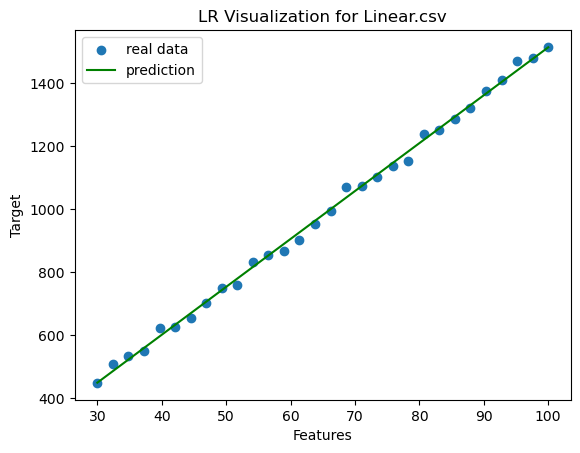

In [ ]:
#Visualize
plt.scatter(area_vec, price_vec, label='real data')
plt.plot(area_vec, regressor.predict(area_vec), color='green', label='prediction')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('LR Visualization for Linear.csv')
plt.legend()
plt.show()


# 4b: Tính loss Root Mean Squared Error - RMSE

In [ ]:
#Tạo hàm RMSE không xài sklearn
def RMSE_byNumpy(real, pred):
    return np.sqrt(np.mean((real-pred)**2))


In [ ]:
#Chạy bằng hàm tạo
print("RMSE không sử dụng sklearn: ",RMSE(price_vec, regressor.predict(area_vec)))


RMSE không sử dụng sklearn:  15.7041357129619


In [ ]:
#Dùng sklearn
from sklearn.metrics import mean_squared_error

print("RMSE sử dụng sklearn: ", np.sqrt(mean_squared_error(price_vec, regressor.predict(area_vec))))


RMSE sử dụng sklearn:  15.7041357129619


# 5a: Fit dữ liệu trong file nonLinear.csv 

In [ ]:
_area_vec = _area.values
_price_vec = _price.values


In [ ]:
#Chạy thử hàm fit
_regressor = LR_byNumpy()
_regressor.fit(_area_vec, _price_vec)
print("Vector w: \n", _regressor.w)


Vector w: 
 [[-1788.5078219 ]
 [   30.00003629]]


In [ ]:
#Chạy thử hàm Predict
#So sánh lại cho dataset của chính nó:
print("Giá thực tế:\n", _price_vec)
print("\nGiá dự đoán:\n", regressor.predict(_area_vec))


Giá thực tế:
 [-100.     -190.725  -269.798  -337.218  -392.985  -437.099  -469.56
 -490.369  -499.524  -497.027  -482.878  -457.075  -419.62   -370.511
 -309.75   -237.337  -153.27    -57.5505   49.8216  168.847   299.524
  441.855   595.838   761.474   938.763  1127.71   1328.3    1540.55
 1764.45   2000.    ]

Giá dự đoán:
 [ 449.26845534  485.98498632  522.70151729  559.41804826  596.13457923
  632.85111021  669.56764118  706.28417215  742.99918201  779.71571299
  816.43224396  853.14877493  889.8653059   926.58183687  963.29836785
 1000.01489882 1036.73142979 1073.44796076 1110.16449174 1146.88102271
 1183.59755368 1220.31408465 1257.02909452 1293.74562549 1330.46215646
 1367.17868743 1403.89521841 1440.61174938 1477.32828035 1514.04481132]


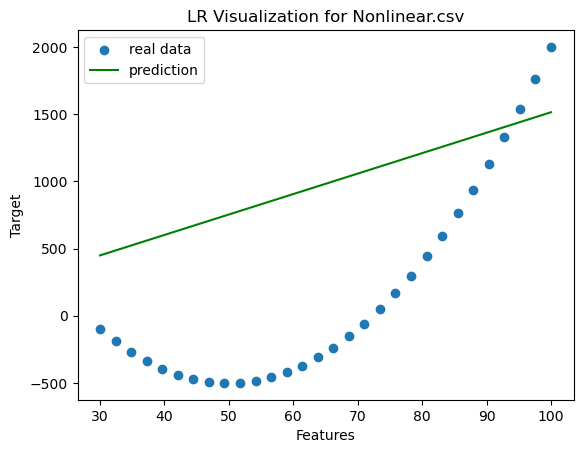

In [ ]:
#Visualize
plt.scatter(_area_vec, _price_vec, label='real data')
plt.plot(_area_vec, regressor.predict(_area_vec), color='green', label='prediction')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('LR Visualization for Nonlinear.csv')
plt.legend()
plt.show()


# 5b: Tính loss Root Mean Squared Error - RMSE

In [ ]:
print("RMSE: ", RMSE(_price_vec, regressor.predict(_area_vec)))


RMSE:  959.1903702774238


# 5c: Nhận xét về kết quả của thuật toán Linear Regression trên dữ liệu nonLinear.csv

Hạn chế lớn về mặt dự đoán: Lệch quá nhiều so với thực tế. Rõ hơn thông qua Visualization, hàm dự đoán là một đường thẳng trong khi thực tế biểu diễn một parabol.
=> Cần thay đổi mô hình để đạt được hiệu quả tốt hơn.


# 5d: Phương án đề ra

Phương án là thay đổi từ hàm bậc một sang hàm bậc hai.


# 5e: Thực hiện

In [ ]:
class LR_forparabol:
#     X; y; ypre; w
    def __init__(self):
        self.w = None
    def fit(self, X, y):
        # Tạo Vector X
        X = np.column_stack([np.ones(len(X)), X, X**2])
        # Vì thuật toán vẫn là Regression nên cách thức tính w vẫn như vậy: w = (XT.X)^-1.XT.y
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y.reshape(-1, 1)
    def predict(self, X):
        X = np.column_stack([np.ones(len(X)), X, X**2])
        # Tínhypre
        ypre= X @ self.w
        return ypre.flatten()
    

In [ ]:
#Chạy thử hàm fit
_reg_improve = LR_forparabol()
_reg_improve.fit(_area_vec, _price_vec)
print("Vector w: \n",_reg_improve.w)

Vector w: 
 [[ 2.00000579e+03]
 [-1.00000222e+02]
 [ 1.00000199e+00]]


In [ ]:
#Chạy thử hàm Predict
#So sánh lại cho dataset của chính nó:
print("Giá thực tế:\n",_price_vec)
print("\nGiá dự đoán:\n",_reg_improve.predict(_area_vec))


Giá thực tế:
 [-100.     -190.725  -269.798  -337.218  -392.985  -437.099  -469.56
 -490.369  -499.524  -497.027  -482.878  -457.075  -419.62   -370.511
 -309.75   -237.337  -153.27    -57.5505   49.8216  168.847   299.524
  441.855   595.838   761.474   938.763  1127.71   1328.3    1540.55
 1764.45   2000.    ]

Giá dự đoán:
 [ -99.99908082 -190.7248871  -269.79780933 -337.21784751 -392.98500165
 -437.09927175 -469.56065781 -490.36915981 -499.52463985 -497.02785653
 -482.87818916 -457.07563775 -419.6202023  -370.5118828  -309.75067926
 -237.33659168 -153.26962004  -57.54976437   49.82297535  168.84859911
  299.52710692  441.85849878  595.83615397  761.47283116  938.76239238
 1127.70483765 1328.30016697 1540.54838033 1764.44947773 2000.00345918]


In [ ]:
print("RMSE: ", RMSE(_price_vec, _reg_improve.predict(_area_vec)))

RMSE:  0.001614465237753362


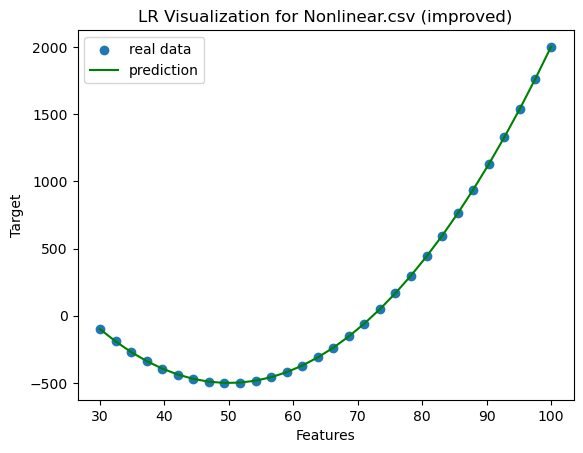

In [ ]:
#Visualize
plt.scatter(_area_vec, _price_vec, label='real data')
plt.plot(_area_vec, _reg_improve.predict(_area_vec), color='green', label='prediction')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('LR Visualization for Nonlinear.csv (improved)')
plt.legend()
plt.show()


# Problem_5: sample.csv

In [ ]:
datafile3 = pd.read_csv("sample.csv")
f = datafile3["%Fat"] #f viết tắt cho %Fat
#Các feature được chỉ định xài:
fn = datafile3["Femoral Neck"] #fn viết tắt cho Femoral Neck
ac = datafile3["Activity"] #ac viết tắt cho Activity
fs = datafile3["%Fat S"] #fs viết tắt cho %Fat S
p = datafile3["pound"] #pound viết tắt cho pound
#Target:
kg = datafile3["Kg"] # kg viết tắt cho Kg
#Chuyển vec
fn_vec = fn.values
ac_vec = ac.values
fs_vec = fs.values
p_vec = p.values
kg_vec = kg.values
#X_ini được tạo thành từ việc gộp 4 vector của target lại với nhau, sau đó áp dụng hàm Linear Regression đã tạo ở trên
X_ini = np.column_stack((fn_vec, ac_vec , fs_vec, p_vec))

In [ ]:
reg_sample = LR_byNumpy()
reg_sample.fit(X_ini, kg_vec)
print("Vector w: \n", reg_sample.w)


Vector w: 
 [[-5.32907052e-14]
 [ 1.14397380e-12]
 [ 2.42861287e-17]
 [ 1.58206781e-14]
 [ 4.50000000e-01]]


In [ ]:
#Chạy thử hàm Predict
#So sánh lại cho dataset của chính nó:
print("Kg thực tế:\n", kg_vec)
print("\nKg dự đoán:\n", reg_sample.predict(X_ini))


Kg thực tế:
 [52.163126  61.8019645 93.4400344 59.8741968 50.3487564 57.6062348
 51.7095336 54.8846804 53.9774956 53.5239032 56.9258462 63.6163341
 75.0695422 48.761183  48.4209887 72.6881821 54.431088  78.4714852
 58.5134196 49.5549697 57.7196329 46.7200172 46.7200172 48.3075906
 49.4415716 45.35924   44.1118609 43.5448704 40.1429274 46.7200172
 44.4520552 45.35924   43.091278  52.163126  34.5864205 56.69905
 34.9266148 35.3802072 37.6481692 39.0089464 41.7305008 38.1017616
 33.5658376 33.6792357 49.4415716 39.0089464 63.0493436 49.895164
 58.7402158 56.8124481 61.6885664 54.431088  93.8936268 74.3891536
 96.1615888 72.574784  98.4295508 51.5961355 56.2454576 59.4206044
 93.4400344 48.9879792 53.750699  91.6256648 62.5957512 68.03886
 84.3681864 69.85323   54.431088  68.2656562 48.1941925 46.3798229
 54.8846804 61.9153626 49.1013773 49.1013773 33.5658376 42.8644818
 43.091278  42.1840932 47.7406001 44.4520552 43.5448704 42.5242875
 40.823316  47.7406001 42.6376856 43.5448704 45.35924 

In [ ]:
print("RMSE: ", RMSE(kg_vec, reg_sample.predict(X_ini)))
      

RMSE:  2.226668481443627e-13


Nhận xét: Giá trị kg thực tế và dự đoán sai khác không lớn. Tuy nhiên, để hoàn hảo hơn (RMSE thấp hơn có thể), ta có thể tiến hành loại bỏ biến không cần thiết.

In [ ]:
#Test các X_ini khi loại bỏ 1 cột tương ứng:
X_0= np.delete(X_ini, 0, axis=1)
X_1= np.delete(X_ini, 1, axis=1)
X_2= np.delete(X_ini, 2, axis=1)
X_3= np.delete(X_ini, 3, axis=1)
#Thực hiện thuật toán LR lên các trường hợp:
test_0 = LR_byNumpy()
test_0.fit(X_0, kg_vec)
test_1 = LR_byNumpy()
test_1.fit(X_1, kg_vec)
test_2 = LR_byNumpy()
test_2.fit(X_2, kg_vec)
test_3 = LR_byNumpy()
test_3.fit(X_3, kg_vec)
#Tính các RMSE tương ứng:
print("RMSE khi bỏ fn: ", RMSE(kg_vec, test_0.predict(X_0)))
print("RMSE khi bỏ ac: ", RMSE(kg_vec, test_1.predict(X_1)))
print("RMSE khi bỏ fs: ", RMSE(kg_vec, test_2.predict(X_2)))
print("RMSE khi bỏ p: ", RMSE(kg_vec, test_3.predict(X_3)))


RMSE khi bỏ fn:  2.0847077057380704e-13
RMSE khi bỏ ac:  3.764725116048166e-13
RMSE khi bỏ fs:  4.280393421205711e-13
RMSE khi bỏ p:  6.617340352324685


Quan sát ta thấy, việc bỏ đi biến fn sẽ mang lại kết quả RMSE thấp nhất, đúng với việc hệ số của w1 trong vector w là thấp nhất (không tính w0 vì w0 là hệ số tự do).
=> Vậy có thể kết luận là bỏ biến fn (Femoral Neck) thì mô hình dự đoán sẽ tốt nhất.
=> Việc bỏ biến để cải thiện mô hình có thể dựa trên cơ sở các thành phần của vector w.